In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading data from storage
data = pd.read_csv('hours_studies.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [5]:
data.shape

(25, 2)

As we imported the data and we see that there are 25 records and 2 features in our dataset.

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Here first we find out, whether there are any missing values in our dataset or not. so we find out by isnull() function and we have no missing values in both the features.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


By info function, we get to know that there is one float datatype and one integer datatype.

Let's plot our data points to explore our dataset and lets see we can manually find out some pattern or trend in data.

<Figure size 864x576 with 0 Axes>

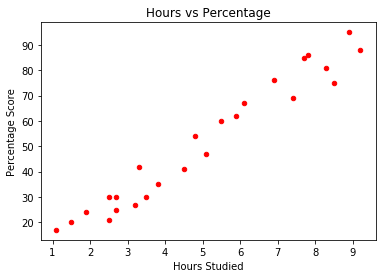

In [8]:
# Plotting the distribution of scores
plt.figure(figsize=(12,8))
data.plot.scatter(x='Hours', y='Scores', color = 'red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [9]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

Here we divided our dataset into two parts that is independent feature i.e. x and target variable i.e. y

In [10]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Now that we have our independent and target features seperated, the next step is to split this data into training and test sets. We'll do this by using Sklearn's train_test_split() method

In [11]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train) 
line = model.coef_*x+model.intercept_

So here we trained our linear regression model on train dataset.

In [12]:
print('Intercept of given fiited line is:{}'.format(model.intercept_))
print('Coefficient of x for given fiited line is:{}'.format(model.coef_))

Intercept of given fiited line is:2.018160041434683
Coefficient of x for given fiited line is:[9.91065648]


The coefficient of x is given as 9.91 and intercept of fitted line is given as 2.01

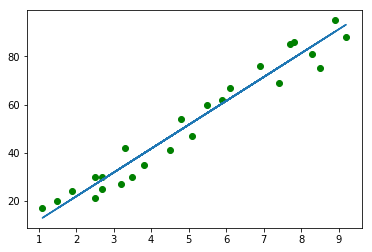

In [13]:
plt.scatter(x, y, color = 'g')
plt.plot(x, line)

The above plot shows the best fitted line on our given dataset and the green points are our actual observations of dataset.

In [14]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
y_pred = model.predict(x_test)

By using predict method, we predict the values for target variable

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R-square:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
R-square: 0.9454906892105356


Here basically we evluated the acuraccy of our trained model in three different ways

Mean Absolute Error value is 4.18 i.e. it is near to zero so our linear regressor model gives more acurate values for new dataset
R-square value is 0.9454 that means 94% of our values are correctly predicted byour model.

In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Here we compared both the Actual observations and our predicted values and store it in a dataframe.

It looks quite similar values in both actual and predicted columns respectively.

In [18]:
n = float(input())
hours = np.array([n])
hours = hours.reshape(-1, 1)
pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))


9.25
No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


We predicted the score by using predict method for our input i.e. 9.25 hours and we get the score i.e. 93.69